# Osnovni podatki

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Podatki - ratings

In [2]:
#data = np.loadtxt ('../rating.csv', delimiter=",", skiprows=1)
data = np.loadtxt ('../ratingSAMPLE.csv', delimiter=",", skiprows=1)
data

array([[  1.00000000e+00,   2.40000000e+01,  -1.00000000e+00],
       [  1.00000000e+00,   7.90000000e+01,  -1.00000000e+00],
       [  1.00000000e+00,   2.26000000e+02,  -1.00000000e+00],
       ..., 
       [  3.09300000e+03,   9.51500000e+03,   8.00000000e+00],
       [  3.09300000e+03,   9.65600000e+03,   9.00000000e+00],
       [  3.09300000e+03,   9.75000000e+03,   6.00000000e+00]])

Koda za pridobitev dejanskih ratingov (brez ogledov brey ocene)

In [3]:
data[data[:,2]!=-1,2]

array([ 10.,  10.,  10., ...,   8.,   9.,   6.])

Število vseh ratingov

In [4]:
len(data[:])

299999

Število ocenjenih animejev

In [5]:
len(data[data[:,2]!=-1,2])

238592

Število neocenjenih ratingov

In [6]:
len(data)-len(data[data[:,2]!=-1,2])

61407

Povprečni rating

In [7]:
np.mean(data[data[:,2]!=-1,2])

7.8694633516630903

Standardni odklon

In [8]:
np.std(data[data[:,2]!=-1,2])

1.5287193824702126

Varianca

In [9]:
np.var(data[data[:,2]!=-1,2])

2.3369829503401078

Minimum in maksimum

In [10]:
print(np.min(data[data[:,2]!=-1,2]))
print(np.max(data[data[:,2]!=-1,2]))

1.0
10.0


### Barplot porazdelitve

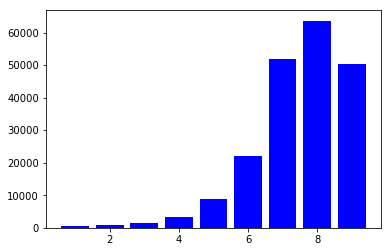

In [11]:
ratingsNum=list()
for number in np.arange(1,10):
    ratingsNum.append(len(data[data[:,2]==number,2]))

plt.figure()
plt.bar(np.arange(1,10),ratingsNum, 0.8, color="blue")
plt.show()

Zaradi velikosti smo naredili sample dataset. Da se ga da dati na github, sem omejil na 3*10<sup>5</sup> vrstic

In [12]:
#ratingsSample=data[:300000,:]
#np.savetxt('../ratingSAMPLE.csv', ratingsSample, delimiter=',')

## Podatki - animeji

In [13]:
from csv import DictReader

In [14]:
animeDataReader = DictReader(open("../anime.csv", "rt", encoding = "utf-8"))

In [15]:
genresCSV = DictReader(open("../zanri/statistikaZanrov.csv", "rt", encoding = "utf-8"))

In [16]:
genres=list()

for genreLine in genresCSV:
    genres.append(genreLine["zanr"])
animeGenre=dict()

In [17]:
for row in animeDataReader:
    i=0
    rowGenres={}
    for genr in genres:
        i=i+1
        if genr in row["genre"]:
            rowGenres[genr]=True
        else:
            rowGenres[genr]=False
    animeGenre[row["anime_id"]]=rowGenres

Narejen je vgnezdeni dict objekt, ki za vsak anime hrani ali je ali ni določenega žanra

In [18]:
print(animeGenre['123'])

{'Romance': True, 'Supernatural': False, 'Super Power': False, 'Yuri': False, 'Martial Arts': True, 'Horror': False, 'Space': False, 'Josei': False, 'Shoujo': True, 'Shounen Ai': False, 'Kids': False, 'Hentai': False, 'Slice of Life': False, 'Fantasy': True, 'Psychological': False, 'Ecchi': False, '?': False, 'Mecha': False, 'Parody': False, 'Sci-Fi': False, 'School': False, 'Game': False, 'Dementia': False, 'Thriller': False, 'Sports': False, 'Adventure': True, 'Vampire': False, 'Cars': False, 'Harem': False, 'Music': False, 'Action': False, 'Demons': False, 'Shounen': False, 'Shoujo Ai': False, 'Historical': True, 'Comedy': True, 'Police': False, 'Samurai': False, 'Magic': True, 'Drama': True, 'Military': False, 'Yaoi': False, 'Seinen': False, 'Mystery': False}


In [19]:
print(animeGenre['123']['Romance'])

True


Preštejemo, koliko imamo posameznih žanrov v trenutni izbiri

In [20]:
genreNum = {}

for genr in genres:
    genreNum[genr]=0
    
animeDataReader = DictReader(open("../anime.csv", "rt", encoding = "utf-8"))

for row in animeDataReader:
    for genr in genres:
        if animeGenre[row["anime_id"]][genr]:
            genreNum[genr]=genreNum[genr]+1

In [21]:
genreNum

{'?': 62,
 'Action': 2845,
 'Adventure': 2348,
 'Cars': 72,
 'Comedy': 4645,
 'Dementia': 240,
 'Demons': 294,
 'Drama': 2016,
 'Ecchi': 637,
 'Fantasy': 2309,
 'Game': 181,
 'Harem': 317,
 'Hentai': 1141,
 'Historical': 806,
 'Horror': 369,
 'Josei': 54,
 'Kids': 1609,
 'Magic': 778,
 'Martial Arts': 265,
 'Mecha': 944,
 'Military': 426,
 'Music': 860,
 'Mystery': 495,
 'Parody': 408,
 'Police': 197,
 'Psychological': 229,
 'Romance': 1464,
 'Samurai': 148,
 'School': 1220,
 'Sci-Fi': 2070,
 'Seinen': 547,
 'Shoujo': 652,
 'Shoujo Ai': 55,
 'Shounen': 1776,
 'Shounen Ai': 65,
 'Slice of Life': 1220,
 'Space': 381,
 'Sports': 543,
 'Super Power': 465,
 'Supernatural': 1037,
 'Thriller': 87,
 'Vampire': 102,
 'Yaoi': 39,
 'Yuri': 42}

Normalizirano gleda na celoto

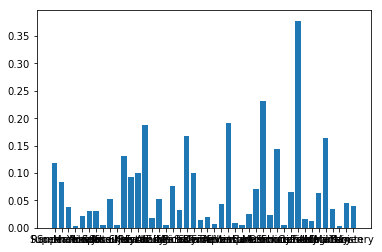

In [22]:
genreNumNorm={}

for val in genreNum.keys():
    genreNumNorm[val]=genreNum[val]/len(animeGenre)

plt.bar(range(len(genreNumNorm)), genreNumNorm.values())
plt.xticks(range(len(genreNumNorm)), genreNumNorm.keys())

plt.show()

Povprečno število žanrov na anime

In [23]:
avgGenresPerAnime=0
for val in genreNumNorm.keys():
    avgGenresPerAnime=avgGenresPerAnime+genreNumNorm[val]
    
print(avgGenresPerAnime)

2.965674312672848
